# Tarea 2

Miguel Raz y Claudio Pierard

1) Consideren la función

\begin{equation}
z_{n+1} = z_n^2 + c, 
\end{equation}

con `c = 0.12256484161600012 - 0.74486407104im`. Definan una malla de valores iniciales $z_0$ en el intervalo $[-1,1]\times [-1,1]$ (parte real $\times$ parte imaginaria).

- ¿Cuantos valores finitos distintos (en el intervalo $[-1,1]\times [-1,1]$) se pueden obtener después de un gran número de iteraciones?

- Usando un color distinto para cada uno, grafiquen en el plano $\textrm{Re}(z) - \textrm{Im}(z)$ el conjunto obtenido.

2) Usando la función `compute_roots` vista en clase, o en alguna variación propuesta por ustedes, definan (en Julia) el mapeo

\begin{equation}
x_{n+1} = B(x_{n}) = 2x_n \mod 1.
\end{equation}

- Obtengas los puntos fijos de este mapeo numéricamente. Los puntos fijos del mapeo son aquéllos que se mapean en si mismos, es decir, $x_{n} = B(x_{n})$. Este cálculo se puede hacer a mano, lo que debe usarse para comprobar que la implementación numérica funciona bien.

- Pensando en que la estabilidad de un punto fijo es el comportamiento que se observa de los iterados (a priori un número infinito) al considerar pequeñas desviaciones del punto fijo, ¿cuál es la estabilidad de los puntos fijos que se obtiene *numéricamente*, digamos, después de 100 iteraciones? ¿Pueden encontrar una explicación analítica de la observación numérica?

*Hint: Sean imaginos y no se conformen*

#### Pregunta 1
Haciendo la malla de condiciones iniciales:

In [1]:
using PyPlot

INFO: Recompiling stale cache file /Users/claudiopierard/.julia/lib/v0.4/PyPlot.ji for module PyPlot.
INFO: Recompiling stale cache file /Users/claudiopierard/.julia/lib/v0.4/PyCall.ji for module PyCall.
INFO: Recompiling stale cache file /Users/claudiopierard/.julia/lib/v0.4/Conda.ji for module Conda.
INFO: Recompiling stale cache file /Users/claudiopierard/.julia/lib/v0.4/MacroTools.ji for module MacroTools.


In [2]:
function initial_conditions(rango)
    
    imaginarios = collect(rango)
    reales = collect(rango)
    
    Z_initial = complex(zeros(length(rango), length(rango)))
    
    for j in 1 : length(rango)
        for i in 1 : length(rango)
            
            Z_initial[i,j] = complex(reales[i], imaginarios[j])
            
        end
    end
    
    Z_initial
    
end

initial_conditions (generic function with 1 method)

In [3]:
function iterator(f, X0, n)
    
    for t in 1:n
        for i in 1:length(X0[:,1])
            for j in 1:length(X0[1,:])
                
                X0[i,j] = f(X0[i,j])
                
            end
        end
    end
    
    X0
    
end

iterator (generic function with 1 method)

In [22]:
f(z) = z^2 + complex(0.12256484161600012, 0.74486407104)

f (generic function with 1 method)

In [23]:
initial_conditions(-1:1/1028:1)

2057x2057 Array{Complex{Float64},2}:
      -1.0-1.0im       -1.0-0.999027im  …       -1.0+1.0im
 -0.999027-1.0im  -0.999027-0.999027im     -0.999027+1.0im
 -0.998054-1.0im  -0.998054-0.999027im     -0.998054+1.0im
 -0.997082-1.0im  -0.997082-0.999027im     -0.997082+1.0im
 -0.996109-1.0im  -0.996109-0.999027im     -0.996109+1.0im
 -0.995136-1.0im  -0.995136-0.999027im  …  -0.995136+1.0im
 -0.994163-1.0im  -0.994163-0.999027im     -0.994163+1.0im
 -0.993191-1.0im  -0.993191-0.999027im     -0.993191+1.0im
 -0.992218-1.0im  -0.992218-0.999027im     -0.992218+1.0im
 -0.991245-1.0im  -0.991245-0.999027im     -0.991245+1.0im
 -0.990272-1.0im  -0.990272-0.999027im  …  -0.990272+1.0im
   -0.9893-1.0im    -0.9893-0.999027im       -0.9893+1.0im
 -0.988327-1.0im  -0.988327-0.999027im     -0.988327+1.0im
          ⋮                             ⋱                 
    0.9893-1.0im     0.9893-0.999027im  …     0.9893+1.0im
  0.990272-1.0im   0.990272-0.999027im      0.990272+1.0im
  0.991245-1.0im   

In [24]:
Z1 = initial_conditions(-1:1/1028:1)
Zf = iterator(f, Z1, 10)

2057x2057 Array{Complex{Float64},2}:
 -1.98747e224-6.7228e223im   …    3.91609e38-3.13054e38im 
 -1.11797e224-8.31974e223im       1.43177e37-1.60854e38im 
 -5.35708e223-7.54706e223im      -3.40906e37-3.85651e37im 
 -1.83615e223-5.86511e223im      -1.62228e37-4.69368e35im 
  4.34199e221-4.08038e223im      -3.54496e36+3.61141e36im 
  8.64591e222-2.56739e223im  …    8.33469e34+1.55769e36im 
  1.07273e223-1.44329e223im       3.69064e35+2.99334e35im 
  9.73403e222-6.90724e222im       1.41152e35-2.29465e34im 
  7.56142e222-2.35974e222im       2.25719e34-3.60105e34im 
  5.25574e222+6.45969e220im      -3.65397e33-1.19211e34im 
  3.30231e222+1.12091e222im  …   -3.31342e33-1.43214e33im 
  1.85246e222+1.38593e222im      -9.20874e32+4.63198e32im 
  8.83193e221+1.25499e222im      -6.37793e31+2.83152e32im 
             ⋮               ⋱                            
  -9.20874e32+4.63198e32im   …   1.85246e222+1.38593e222im
  -3.31342e33-1.43214e33im       3.30231e222+1.12091e222im
  -3.65397e33-1.192

In [20]:
isnan(0/0 ) && 0

0

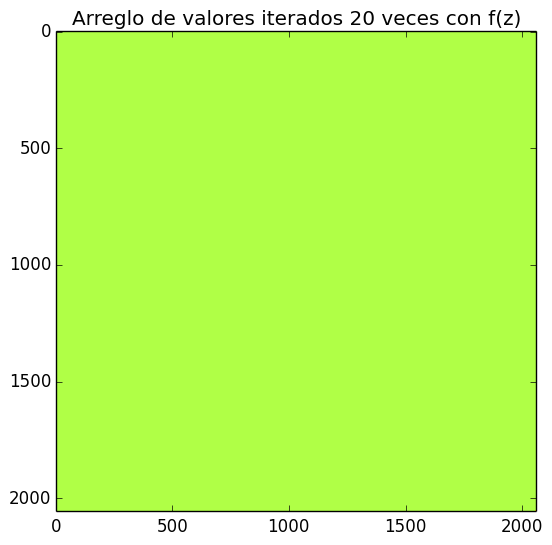

PyObject <matplotlib.text.Text object at 0x33cfaf290>

In [25]:
imshow(imag(Zf))
title("Arreglo de valores iterados 20 veces con f(z)")

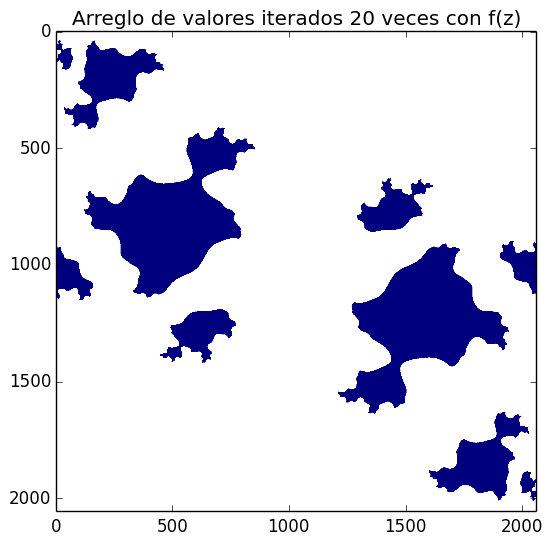

PyObject <matplotlib.text.Text object at 0x32feeb5d0>

In [8]:
Z_ri = real(Zf) .- imag(Zf)
imshow(Z_ri)
title("Arreglo de valores iterados 20 veces con f(z)")

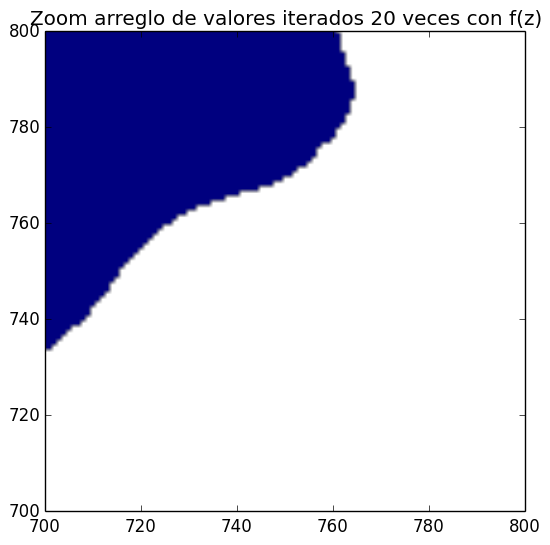

PyObject <matplotlib.text.Text object at 0x33668b650>

In [9]:
imshow(imag(Zf))
ylim(700,800)
xlim(700,800)
title("Zoom arreglo de valores iterados 20 veces con f(z)")

**Observaciones:** Al iterar más de 20 veces la función f, con un conjunto de condiciones iniciales complejas en $[-1,1]\times [-1,1]$, todos los valores divergen. 

- Sólo iterarlo un número $n < 20$, antes que que todo diverja.
- Buscar otra forma de graficarlo.

#### Pregunta 2

In [10]:
function compute_roots(f, f´, range)
    initial_conditions = range
    roots = similar(initial_conditions)

    for (j, x_0) in enumerate(initial_conditions)
        x = x_0

        # 100 iterations of Newton's method
        for i in 1:100
            x = x - f(x) / f´(x)
        end

        roots[j] = x
    end
    
    roots
end

compute_roots (generic function with 1 method)

In [36]:
#g(x) = 2x%1 #Mapeo
g(x) = 2*x < 1 ? 2*x : 2*x-1
dg(x) = 2

dg (generic function with 1 method)

Definiendo un arreglo de condiciones iniciales:

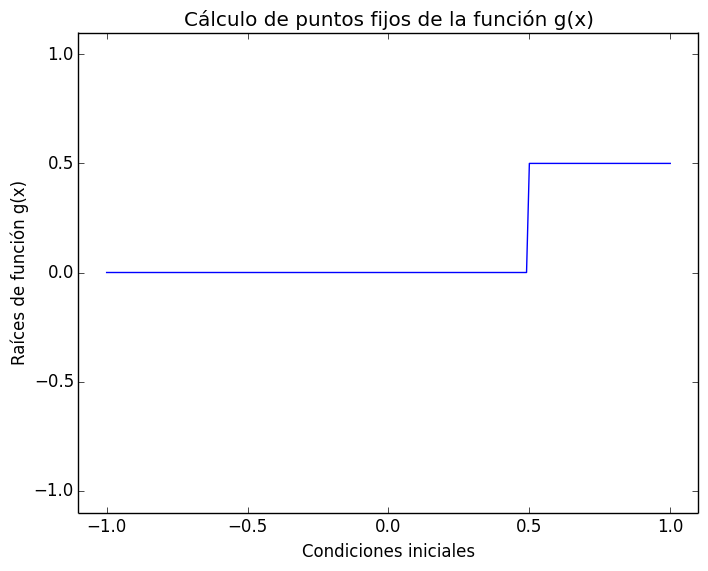

PyObject <matplotlib.text.Text object at 0x349f15650>

In [37]:
mirango = -1:0.01:1
groots = compute_roots(g, dg, -1:0.01:1)
plot(mirango, groots)
ylim(-1.1, 1.1)
xlim(-1.1, 1.1)

xlabel("Condiciones iniciales")
ylabel("Raíces de función g(x)")
title("Cálculo de puntos fijos de la función g(x)")

**Observaciones:** Para valores iniciales en el intervalo $[-1,1]$, los puntos fijos son $-0.5$, $0$ y $0.5$.

In [41]:
function mapeos(f, X0, n)
    
    x_solution = zeros(eltype(X0), length(X0), n)   #Estoy considerando a X0 como un array de 1 x n dimensiones.
    x_solution[:, 1] = X0
    
    for t in 2:n
        for i in 1:length(X0)
        
            x_solution[i,t] = f(x_solution[i, t-1])
            
        end
        
    end
    
    x_solution
    
end

mapeos (generic function with 1 method)

In [42]:
t = collect(1:100)
#X0 = collect(0.1:0.1:1)
X0=[2//5, 1//27]
Xf = mapeos(g, X0, 100)

figure(figsize=(12,4))

for i in 1:3:length(Xf[:,1])
    etiqueta = Xf[i,1]
    plot(t, Xf[i,:]', label=("x0 = $etiqueta"))
    #plot(t, Xf[i,:]', "-.")
    
end
#plot(t, Xf[5,:]', label=("x0 = 0.5"))
plot(Xf[5,:]', label=("x0 = 0.5"))

ylim(-0.1, 1.1)
xlabel("Iteraciones")
ylabel("g(x)")
title("Mapeos de función g(x) con condiciones iniciales en el intervalo [0,1]")
legend()

LoadError: LoadError: BoundsError: attempt to access 2x100 Array{Rational{Int64},2}:
 2//5   4//5   3//5   1//5    2//5   4//5   …   2//5    4//5    3//5    1//5 
 1//27  2//27  4//27  8//27  16//27  5//27     10//27  20//27  13//27  26//27
  at index [5,Colon()]
while loading In[42], in expression starting on line 15

In [43]:
Xf

2x100 Array{Rational{Int64},2}:
 2//5   4//5   3//5   1//5    2//5   4//5   …   2//5    4//5    3//5    1//5 
 1//27  2//27  4//27  8//27  16//27  5//27     10//27  20//27  13//27  26//27